<a href="https://colab.research.google.com/github/Renggobawaniw/Capstone-Renggo-Bawani-W-Analysis-sentiment/blob/main/Capstone_group2__SMOTE_final7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Introduction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Kelompok 2
### Nama Anggota
### 1. Raja Valentino Kristananda ( SI611007 )
### 2. Renggo Bawani Wijayaningrum ( SI611014 )
### 3. Rizky Agung Setiwawan Rifanny ( SI611024 )
### 4. Reno Fathan Sofyan ( SI611015 )
### 5. Rifqy Ramdhani Hakim ( SI611020 )

##2. Problem Statement and Background

Topik : Analisis Sentimen pada Ulasan Produk   
   
Masalah : Perusahaan e-commerce mendapatkan ribuan ulasan produk dari pelanggan setiap harinya. Ulasan ini sangat berharga untuk memahami kepuasan pelanggan, memperbaiki produk, dan meningkatkan layanan. Namun, mengolah dan menganalisis ulasan dalam jumlah besar secara manual sangat tidak efisien dan memakan waktu. Oleh karena itu, diperlukan suatu sistem otomatis yang dapat mengklasifikasikan sentimen ulasan (positif, negatif, atau netral) secara akurat.   
   
Target : Membangun model deep learning untuk klasifikasi sentimen ulasan produk berdasarkan teks ulasan yang diberikan oleh pelanggan. Model ini diharapkan memenuhi:
*   Mengidentifikasi sentimen dari ulasan produk dengan tingkat akurasi yang tinggi.
*   Memberikan insight yang berharga kepada tim pemasaran dan pengembangan produk untuk pengambilan keputusan yang lebih baik.
*   Meningkatkan pengalaman pengguna dengan menampilkan sentimen secara real-time pada halaman produk.       
   
Metrik Evaluasi : Untuk mengukur kinerja model, beberapa metrik evaluasi yang akan digunakan adalah:
*   Akurasi (Accuracy): Persentase prediksi sentimen yang benar dari total prediksi yang dilakukan.
*   Presisi (Precision): Proporsi prediksi positif yang benar dari semua prediksi positif yang dilakukan.
*   Recall (Recall): Proporsi prediksi positif yang benar dari semua kasus positif yang sebenarnya.
*   F1-Score: Harmonic mean dari precision dan recall, memberikan gambaran yang lebih seimbang tentang kinerja model, terutama pada dataset yang tidak seimbang.
*   Confusion Matrix: Matriks yang menunjukkan jumlah true positive, true negative, false positive, dan false negative, memberikan gambaran detail tentang kinerja model pada setiap kelas sentimen.   
  

#2.5. Import

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import keras
import seaborn as sns
from imblearn.over_sampling import SMOTE
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix

# READING DATA

In [ ]:
df_sentiment = pd.read_csv('/content/sentiment.csv', encoding='ISO-8859-1')

<ipython-input-6-7661fb648551>:1: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sentiment = pd.read_csv('/content/sentiment.csv', encoding='ISO-8859-1')


In [ ]:
df_sentiment.head(3)

,ProductName,ProductPrice,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,Super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,Awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,Fair,the quality is good but the power of air is de...,positive


In [ ]:
df_sentiment.rename(columns={'ï»¿ProductName': 'ProductName'}, inplace=True)
df_sentiment.describe()

,ProductName,ProductPrice,Rate,Review,Summary,Sentiment
count,171380,171379,171379,171379,171379,171379
unique,963,665,11,1336,85074,6
top,Lakm?? Eyeconic Kajal Twin Pack??????????(Deep...,218,5,Nan,good,positive
freq,5000,6999,56717,24664,10864,111103


In [ ]:
print(df_sentiment.shape)

(171380, 6)


In [ ]:
df_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171380 entries, 0 to 171379
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ProductName   171380 non-null  object
 1   ProductPrice  171379 non-null  object
 2   Rate          171379 non-null  object
 3   Review        171379 non-null  object
 4   Summary       171379 non-null  object
 5   Sentiment     171379 non-null  object
dtypes: object(6)
memory usage: 7.8+ MB


In [ ]:
print(df_sentiment.columns.tolist())

['ProductName', 'ProductPrice', 'Rate', 'Review', 'Summary', 'Sentiment']


In [ ]:
df_sentiment.isnull().sum()

ProductName     0
ProductPrice    1
Rate            1
Review          1
Summary         1
Sentiment       1
dtype: int64

## 3. Data Loading and Cleaning

In [ ]:
# Load data
df = pd.read_csv('/content/sentiment.csv', encoding='ISO-8859-1')
df.head(5)

<ipython-input-14-5e89b5cd2d4f>:2: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/sentiment.csv', encoding='ISO-8859-1')


,ProductName,ProductPrice,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,Super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,Awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,Fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,Useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,Fair,ok ok product,neutral


In [ ]:
df['ProductPrice'].unique()

array(['3999', '8999', '7999', '9999', '1199', '499', '1999', '1099',
       '997', '1499', '435', '1349', '30999', '13999', '9990', '14299',
       '5298', '7599', '11999', '329', '425', '249', '302', '59', '245',
       '79', '349', '449', '340', '299', '469', '26990', '23479', '29390',
       '29990', '20990', '44490', '25990', '38490', '42000', '44890',
       '31590', '41990', '52990', '33990', '18990', '50999', '45550',
       '1401', '359', '1453', '254', '205', '1256', '1547', '195', '575',
       '366', '209', '219', '549', '859', '210', '215', '1142', '235',
       '221', '1599', '2454', '6099', '2399', '599', '849', '699',
       'pigeon favourite electric kettle15 l silver black', '4449',
       '4098', '5599', '5499', '1448', '3569', '2879', '1799', '1329',
       '5390', '11500', '1220', '9050', '6505', '6495', '11595', '7649',
       '4399', '6029', '6299', '5919', '6390', '2695', '2949', '7909',
       '4499', '6525', '6589', '5039', '4219', '4319', '7499', '379',
     

In [ ]:
# Mengonversi kolom 'ProductPrice' ke numerik, mengubah elemen non-numerik menjadi NaN
df['ProductPrice'] = pd.to_numeric(df['ProductPrice'], errors='coerce')
df['ProductPrice'] = df['ProductPrice'].astype('Int64')

# Menampilkan DataFrame yang diperbarui
print("\nDataFrame yang diperbarui:")
df['ProductPrice'].unique()


DataFrame yang diperbarui:


<IntegerArray>
[ 3999,  8999,  7999,  9999,  1199,   499,  1999,  1099,   997,  1499,
 ...
 10790,  9190,  3599,  8699,  5149,  4084,  9799,  7690,  3746,  4396]
Length: 439, dtype: Int64

In [ ]:
# Mengonversi kolom 'Rate' ke numerik, mengubah elemen non-numerik menjadi NaN
df['Rate'] = pd.to_numeric(df['Rate'], errors='coerce')
df['Rate'] = df['Rate'].astype('Int64')
# Menampilkan DataFrame yang diperbarui
print("\nDataFrame yang diperbarui:")
print(df['Rate'].unique())


DataFrame yang diperbarui:
<IntegerArray>
[5, 3, 1, 4, 2, <NA>]
Length: 6, dtype: Int64


In [ ]:
# Data Cleaning
# Handling missing values
df.dropna(inplace=True)

In [ ]:
df['Sentiment'].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

In [ ]:
# Mengubah nilai "Negative" dan "Positive" menjadi "negative" dan "positive"
df['Sentiment'] = df['Sentiment'].str.lower()

# Memeriksa nilai unik setelah perubahan
unique_values_sentimen = df['Sentiment'].unique()
print("Nilai unik setelah perubahan:", unique_values_sentimen)

Nilai unik setelah perubahan: ['positive' 'negative' 'neutral']


In [ ]:
df['ProductName'].unique()

array(['Candes 12 L Room/Personal Air Cooler??????(White, Black, Elegant High Speed-Honey Comb Cooling Pad & Ice Chamber, Blower)',
       'Candes 60 L Room/Personal Air Cooler??????(White, Black, CRETA)',
       'MAHARAJA WHITELINE 65 L Desert Air Cooler??????(White, Grey, Rambo Grey / AC-303)',
       'Crompton 75 L Desert Air Cooler??????(White, Teal, ACGC-DAC751)',
       'boAt Rockerz 510 Super Extra Bass Bluetooth Headset??????(Molten Orange, On the Ear)',
       'Aroma NB119 Titanium - 48 Hours Playtime Bluetooth Neckband Bluetooth Headset??????(Green, In the Ear)',
       'OnePlus Bullets Wireless Z2 with Fast Charge, 30 Hrs Battery Life, Earphones with mic Bluetooth Headset??????(Magico Black, In the Ear)',
       'OnePlus Bullets Wireless Z2 Bluetooth Headset??????(Acoustic Red, In the Ear)',
       'Mivi Roam2 5 W Bluetooth Speaker??????(Black, Mono Channel)',
       'etmax NANO BLACK 30 W Bluetooth Home Theatre??????(Black, Stereo Channel)',
       'Mivi Fort S16 Soundbar w

In [ ]:
# Filter dataset untuk hanya mendapatkan lima baris dengan sentimen neutral
negative_reviews = df[df['Sentiment'] == 'neutral'].head(7)

# Tampilkan ulasan dan ringkasan dari sentimen neutral
for index, row in negative_reviews.iterrows():
    print("Review:", row['Review'])
    print("Summary:", row['Summary'])
    print()

Review: Fair
Summary: ok ok product

Review: Worst experience ever!
Summary: average production

Review: Just okay
Summary: speed is very slow

Review: Decent product
Summary: built quality is not up to the mark overall avearge

Review: Fair
Summary: cooling very late n water will come slowly

Review: Terrible product
Summary: too much big size

Review: Decent product
Summary: ok



In [ ]:
df.shape[0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152978 entries, 0 to 171378
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ProductName   152978 non-null  object
 1   ProductPrice  152978 non-null  Int64 
 2   Rate          152978 non-null  Int64 
 3   Review        152978 non-null  object
 4   Summary       152978 non-null  object
 5   Sentiment     152978 non-null  object
dtypes: Int64(2), object(4)
memory usage: 8.5+ MB


# 4. Exploratory Data Analysis

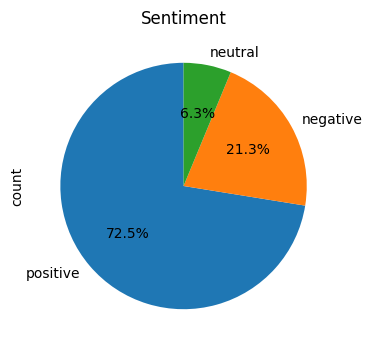

In [ ]:
plt.figure(figsize=(10, 4))
df['Sentiment'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Sentiment')
plt.show()

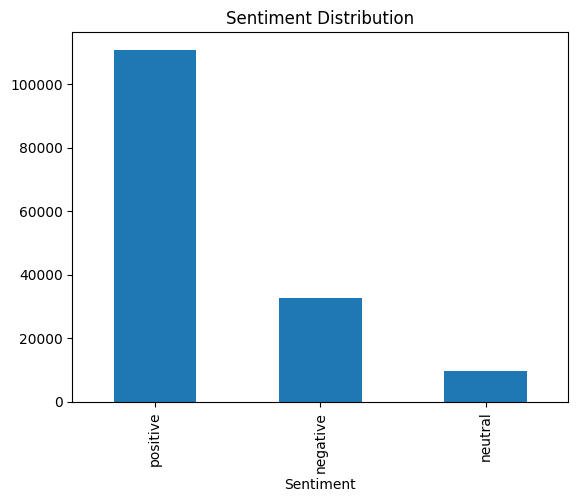

In [ ]:
# Distribution of sentiment
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Distribution')
plt.show()

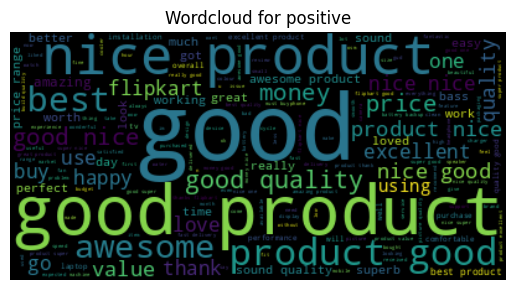

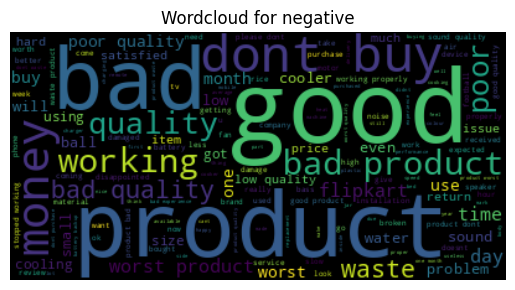

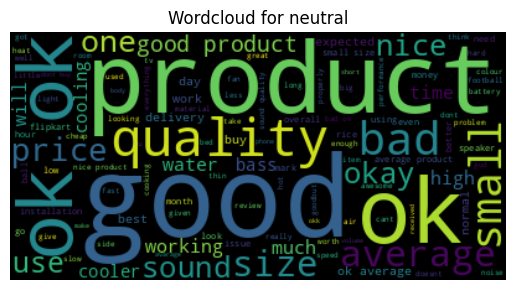

In [ ]:
# Wordcloud for each sentiment
sentiments = df['Sentiment'].unique()
for sentiment in sentiments:
    text = ' '.join(df[df['Sentiment'] == sentiment]['Summary'])
    wordcloud = WordCloud().generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Wordcloud for {sentiment}')
    plt.axis('off')
    plt.show()

## 5. Feature Engineering

In [ ]:
# Text preprocessing
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
%%time
df['Cleaned_Summary'] = df['Summary'].apply(preprocess_text)

CPU times: user 497 ms, sys: 0 ns, total: 497 ms
Wall time: 497 ms


In [ ]:
df.head(3)

,ProductName,ProductPrice,Rate,Review,Summary,Sentiment,Cleaned_Summary
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,Super!,great cooler excellent air flow and for this p...,positive,great cooler excellent air flow price amazing ...
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,Awesome,best budget 2 fit cooler nice cooling,positive,best budget 2 fit cooler nice cooling
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,Fair,the quality is good but the power of air is de...,positive,quality good power air decent


In [ ]:
# Membuat peta pemetaan
mapping = {"positive": 1, "neutral": 0, "negative": -1}
# Mengonversi target menggunakan peta pemetaan
df['Sentiment'] = df['Sentiment'].map(mapping)

In [ ]:
# TF-IDF Vectorization
vocab_size = 5000
maxlen = 500

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(df['Cleaned_Summary'])
sequences = tokenizer.texts_to_sequences(df['Cleaned_Summary'])
padded_sequences = pad_sequences(sequences, maxlen=maxlen)

num_classes = len(df['Sentiment'].unique())

# Konversi labels menjadi array numpy
labels = np.array(df['Sentiment'].astype('category').cat.codes)

## 6. Model Architecture Definition

In [ ]:
class LSTMFeaturization:

    def __init__(self):
        self.word_mapping = None
        self.total_words = None

    def build_vocabulary(self, sentences):
        vocab = set()
        for x in sentences:
            for word in x.split():
                vocab.add(word)
        vocab_dict = dict.fromkeys(vocab, 0)
        for x in sentences:
            for word in x.split():
                vocab_dict[word] += 1
        return vocab_dict

    def get_mapping(self, vocab_dict):
        k, v = zip(*vocab_dict.items())
        kv = np.vstack((k, v)).T
        df = pd.DataFrame(columns=["Word", "Count"], data=kv)
        df['Count'] = df['Count'].astype('int')
        df.sort_values(by=['Count'], ascending=False, inplace=True)
        df.reset_index(inplace=True)
        df['mapping'] = df.index + 1
        df.drop(columns=['index', 'Count'], inplace=True)
        dictionary = dict(zip(df['Word'], df['mapping']))
        return dictionary

    def fit(self, sentences):
        v = self.build_vocabulary(sentences)
        self.word_mapping = self.get_mapping(v)
        self.total_words = len(self.word_mapping)

    def transform(self, sentences, pad_length=350):
        features = []
        for sentence in sentences:
            tokens = sentence.split()
            mapped_sentence = [self.word_mapping.get(word, 0) for word in tokens]
            features.append(mapped_sentence)
        padded_features = pad_sequences(features, maxlen=pad_length)
        return padded_features

In [ ]:
# Inisialisasi objek LSTMFeaturization
lstmfeat = LSTMFeaturization()

# Bagi setiap teks pada X_train dan X_test menjadi list of sentences
X_sentences = [' '.join([str(word) for word in sent]) for sent in padded_sequences]

# Gunakan X_sentences untuk fitting
lstmfeat.fit(X_sentences)

# Transformasi X_sentences
lstm_features = lstmfeat.transform(X_sentences, pad_length=500)


In [ ]:
# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Bagi data menjadi bagian pelatihan dan validasi
X_train, X_val, y_train, y_val = train_test_split(lstm_features, labels, test_size=0.2, random_state=42, stratify=labels)

# Terapkan SMOTE hanya pada data pelatihan
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
# Parameter
embedding_dim = 128  # Dimensi dari vektor embedding
input_length = 500  # Panjang input sequence

# Define model
model = Sequential()
model.add(Embedding(input_dim=lstmfeat.total_words+1, output_dim=embedding_dim, input_length=input_length))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(128, kernel_regularizer=l2(0.01)))  # Add L2 regularization
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))  # Add L2 regularization
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 128)          640128    
                                                                 
 conv1d (Conv1D)             (None, 498, 64)           24640     
                                                                 
 max_pooling1d (MaxPooling1  (None, 249, 64)           0         
 D)                                                              
                                                                 
 lstm (LSTM)                 (None, 128)               98816     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 256)               33024     
                                                        

## 7. Model Training

In [ ]:
# Menyimpan model terbaik dengan ModelCheckpoint
filepath = "weights-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [ ]:
# Latih model dengan data pelatihan dan pantau kinerja pada data validasi
history = model.fit(X_train_smote, y_train_smote, epochs=30, batch_size=512, validation_data=(X_val, y_val), callbacks=callbacks_list)

# Menyimpan sejarah pelatihan
train = history.history['accuracy']

Epoch 1/30
520/520 [==============================] - ETA: 0s - loss: 0.9323 - accuracy: 0.6767
Epoch 1: val_loss improved from inf to 0.49135, saving model to weights-improvement-01-0.49.hdf5
520/520 [==============================] - 57s 97ms/step - loss: 0.9323 - accuracy: 0.6767 - val_loss: 0.4913 - val_accuracy: 0.8419
Epoch 2/30
  2/520 [..............................] - ETA: 31s - loss: 0.6582 - accuracy: 0.7422

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


520/520 [==============================] - ETA: 0s - loss: 0.6143 - accuracy: 0.7432
Epoch 2: val_loss improved from 0.49135 to 0.47362, saving model to weights-improvement-02-0.47.hdf5
520/520 [==============================] - 39s 74ms/step - loss: 0.6143 - accuracy: 0.7432 - val_loss: 0.4736 - val_accuracy: 0.8519
Epoch 3/30
520/520 [==============================] - ETA: 0s - loss: 0.5806 - accuracy: 0.7566
Epoch 3: val_loss improved from 0.47362 to 0.43419, saving model to weights-improvement-03-0.43.hdf5
520/520 [==============================] - 38s 73ms/step - loss: 0.5806 - accuracy: 0.7566 - val_loss: 0.4342 - val_accuracy: 0.8636
Epoch 4/30
520/520 [==============================] - ETA: 0s - loss: 0.5593 - accuracy: 0.7660
Epoch 4: val_loss did not improve from 0.43419
520/520 [==============================] - 37s 70ms/step - loss: 0.5593 - accuracy: 0.7660 - val_loss: 0.4406 - val_accuracy: 0.8582
Epoch 5/30
520/520 [==============================] - ETA: 0s - loss: 0.543

## 8. Model Evaluation

4781/4781 [==============================] - 26s 5ms/step


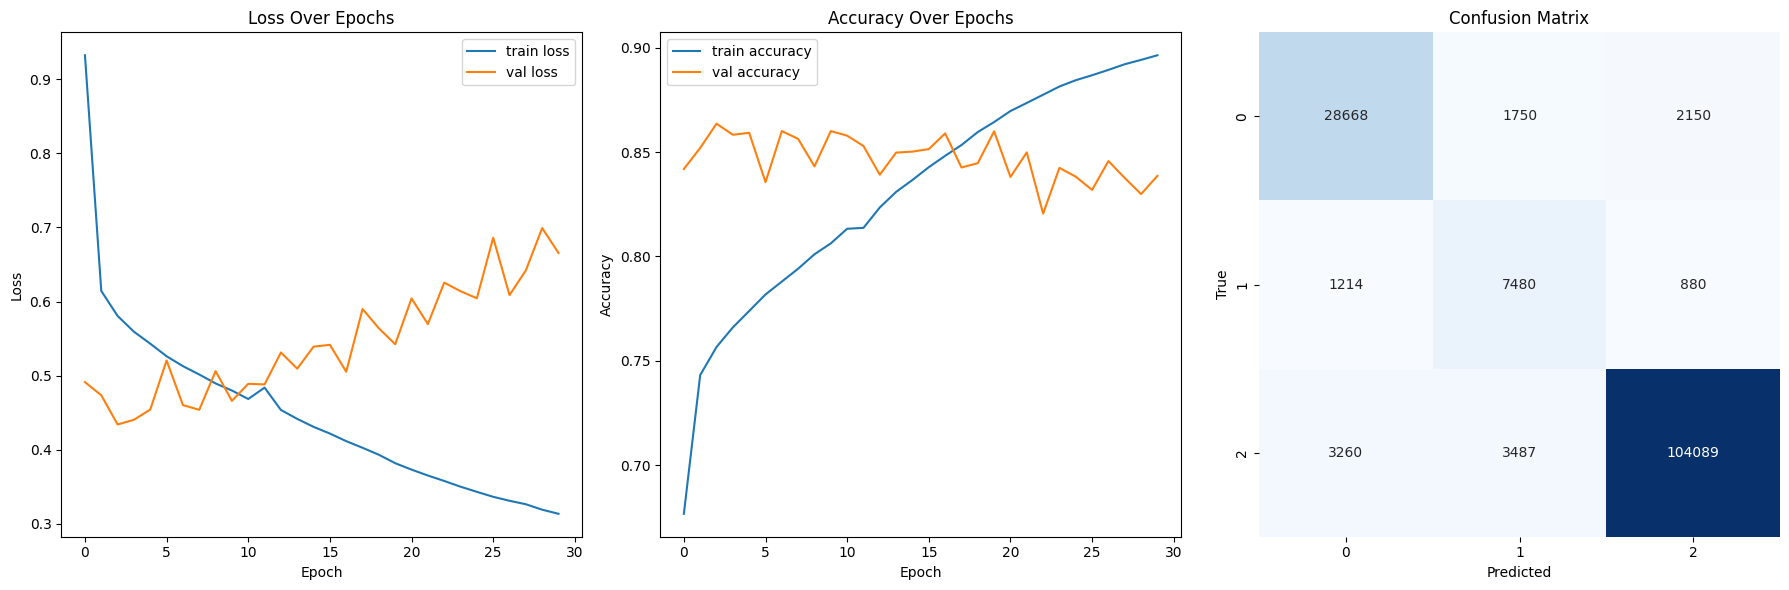

              precision    recall  f1-score   support

           0       0.87      0.88      0.87     32568
           1       0.59      0.78      0.67      9574
           2       0.97      0.94      0.96    110836

    accuracy                           0.92    152978
   macro avg       0.81      0.87      0.83    152978
weighted avg       0.92      0.92      0.92    152978



In [ ]:
# Get predicted classes
y_prob = model.predict(lstm_features)
y_pred = np.argmax(y_prob, axis=1)

# Plot loss and accuracy
plt.figure(figsize=(18, 6))

# Plot loss
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 3, 2)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

# Plot confusion matrix
plt.subplot(1, 3, 3)
conf_matrix = confusion_matrix(labels, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()

# Print classification report
print(classification_report(labels, y_pred, zero_division='warn'))


## 9. Conclusion

// Blum ada

## 10. Deployment

untuk precobaan, ubah text dibawah menjadi code row

# Save model
model.save('sentiment_model.h5')

# Import model to IBM Watson Deployment Space
# This part will be done on IBM Watson interface

# Generate API and create API Key
# This part will be done on IBM Watson interface

# Access the API for predictions
import requests

API_KEY = 'your_ibm_watson_api_key'
MODEL_ENDPOINT = 'your_ibm_watson_model_endpoint'

def predict_sentiment(review):
    data = {
        'review': review
    }
    headers = {
        'Content-Type': 'application/json',
        'Authorization': 'Bearer ' + API_KEY
    }
    response = requests.post(MODEL_ENDPOINT, json=data, headers=headers)
    return response.json()

# Example usage
print(predict_sentiment('This product is excellent!'))


In [ ]:
# Save the model
model.save("/content/drive/MyDrive/test/sentiment_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Load the model
loaded_model = load_model("/content/drive/MyDrive/test/sentiment_model.h5")

##Tes model new data

In [ ]:
new_data = {'ProductName' : 'Candes 60 L Room/Personal Air Cooler??????(White, Black, CRETA)', 'ProductPrice' : 9000, 'Rate' : 5, 'Review' : 'just okay', 'Summary' : 'average production'}
# Mengubah ke dalam DataFrame
new_data_df = pd.DataFrame([new_data])
new_data_df

,ProductName,ProductPrice,Rate,Review,Summary
0,Candes 60 L Room/Personal Air Cooler??????(Whi...,9000,5,just okay,average production


In [ ]:
# Preprocessing data baru
new_summary_processed = preprocess_text(new_data_df['Summary'].iloc[0])

# Ekstraksi fitur
new_combined_sequence = tokenizer.texts_to_sequences([new_summary_processed])
new_combined_padded = pad_sequences(new_combined_sequence, maxlen=maxlen)

# Lakukan prediksi sentimen
result = loaded_model.predict(new_combined_padded)

# Ambil indeks dengan nilai tertinggi
predicted_class_index = np.argmax(result)

# Tentukan label kategori berdasarkan indeks
sentiment_labels = ["Negative", "Neutral", "Positive"]
predicted_sentiment = sentiment_labels[predicted_class_index]

print('Sentimen dari data product tersebut adalah:', predicted_sentiment)

1/1 [==============================] - 1s 522ms/step
Sentimen dari data product tersebut adalah: Positive


ini buat coba gaes

Review: Worth the money

Summary: very nice

Review: Unsatisfactory

Summary: very bad cooler

Review: just okay

Summary: fair cooling

Review: Fair
Summary: ok ok product

Review: Worst experience ever!
Summary: average production

Review: Just okay
Summary: speed is very slow

Review: Decent product
Summary: built quality is not up to the mark overall avearge

Review: Fair
Summary: cooling very late n water will come slowly

Review: Terrible product
Summary: too much big size

Review: Decent product
Summary: ok
